<a href="https://colab.research.google.com/github/3omdation/planet/blob/main/svm%20planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omaremad01","key":"82a8757a121f3bcb3293aefaf4776961"}'}

In [3]:
! mkdir ~/.kaggle/

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/ kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           9414        280  1.0              
mattop/alcohol-consumption-per-capita-2016                      Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            965         35  1.0              
michals22/coffee-dataset                                        Coffee dataset                                       24KB  2022-12-15 20:02:12           1039         37  1.0              
thedevastator/jobs-dataset-from-glassdoor                   

In [7]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 98% 767M/779M [00:05<00:00, 141MB/s]
100% 779M/779M [00:05<00:00, 136MB/s]


In [9]:
!unzip plant-pathology-2020-fgvc7.zip

Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: images/Test_1019.jpg    
  inflati

In [162]:
import numpy as np # linear algebra
import pandas as pd
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [11]:
import os

In [14]:
train = pd.read_csv('train.csv')
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [16]:
test = pd.read_csv('test.csv')
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [17]:
print("Train data shape : rows :-{0} , columns:- {1}".format(train.shape[0], train.shape[1]))

Train data shape : rows :-1821 , columns:- 5


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [19]:
print('Number of empty records :', train.isnull().any().sum())

Number of empty records : 0


In [113]:
path = 'images/'

for i in train['image_id'][:5]:
    print(i)

Train_0
Train_1
Train_2
Train_3
Train_4


In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Image default size (2048, 1365)


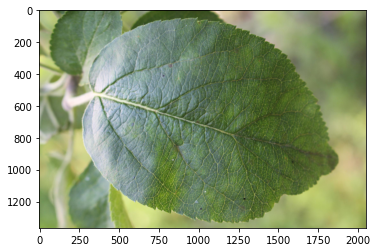

In [32]:
image_index = 5
full_path = path + train['image_id'][image_index] + '.jpg'
img = Image.open(full_path)
plt.imshow(img)

print('Image default size', img.size)

images/Train_2.jpg
images/Train_4.jpg
images/Train_5.jpg
images/Train_9.jpg
images/Train_13.jpg


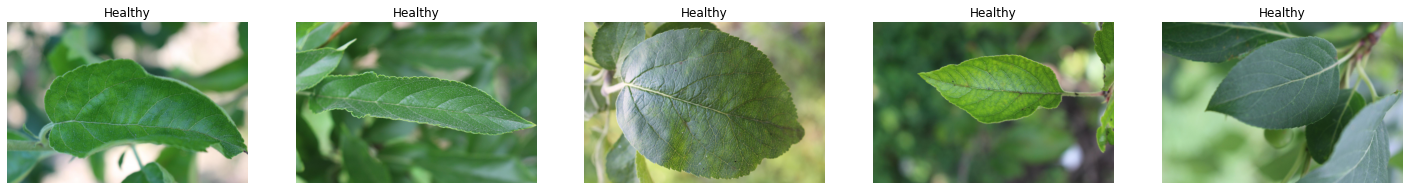

In [114]:
train_healthy = train[train['healthy'] == 1][:5]

fig, axs = plt.subplots(1,5, figsize=(25,6))

for i, j in enumerate(train_healthy['image_id']):
    axs[i].set_axis_off()
    print(path + j + '.jpg')
    full_path = path + j + '.jpg'
    img = Image.open(full_path)
    axs[i].imshow(img)
    axs[i].set_title('Healthy')
#plt.show()

images/Train_0.jpg
images/Train_7.jpg
images/Train_8.jpg
images/Train_11.jpg
images/Train_12.jpg


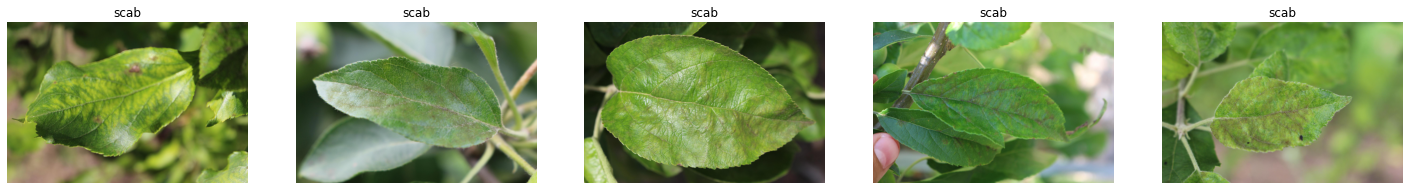

In [115]:
train_healthy = train[train['scab'] == 1][:5]

fig, axs = plt.subplots(1,5, figsize=(25,6))

for i, j in enumerate(train_healthy['image_id']):
    axs[i].set_axis_off()
    print(path + j + '.jpg')
    full_path = path + j + '.jpg'
    img = Image.open(full_path)
    axs[i].imshow(img)
    axs[i].set_title('scab')
# plt.show()

images/Train_3.jpg
images/Train_10.jpg
images/Train_14.jpg
images/Train_15.jpg
images/Train_21.jpg


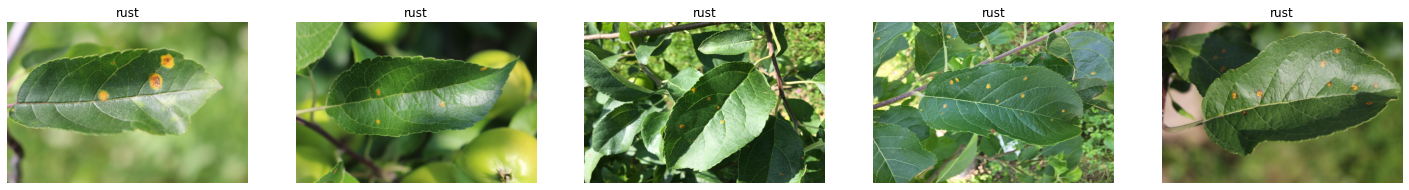

In [116]:
train_healthy = train[train['rust'] == 1][:5]

fig, axs = plt.subplots(1,5, figsize=(25,6))

for i, j in enumerate(train_healthy['image_id']):
    axs[i].set_axis_off()
    print(path + j + '.jpg')
    full_path = path + j + '.jpg'
    img = Image.open(full_path)
    axs[i].imshow(img)
    axs[i].set_title('rust')
plt.show()

images/Train_1.jpg
images/Train_6.jpg
images/Train_25.jpg
images/Train_36.jpg
images/Train_62.jpg


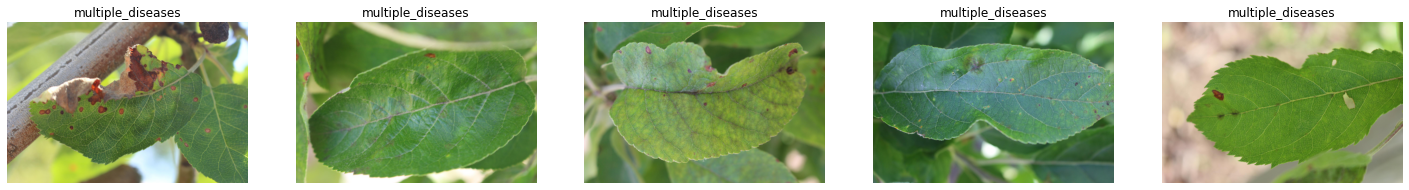

In [117]:
train_healthy = train[train['multiple_diseases'] == 1][:5]

fig, axs = plt.subplots(1,5, figsize=(25,6))

for i, j in enumerate(train_healthy['image_id']):
    axs[i].set_axis_off()
    print(path + j + '.jpg')
    full_path = path + j + '.jpg'
    img = Image.open(full_path)
    axs[i].imshow(img)
    axs[i].set_title('multiple_diseases')
plt.show()

In [41]:
train.shape

(1821, 5)

In [42]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


Text(0.5, 1.0, 'Frequency count')

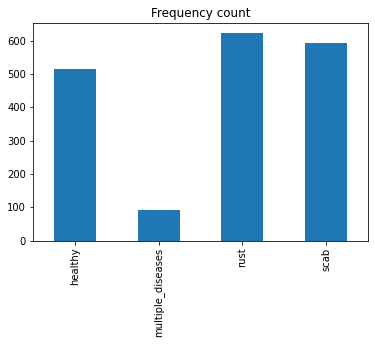

In [43]:
data = train[['healthy', 'multiple_diseases', 'rust', 'scab']].sum(axis=0)
data.plot(kind='bar')
plt.title('Frequency count')

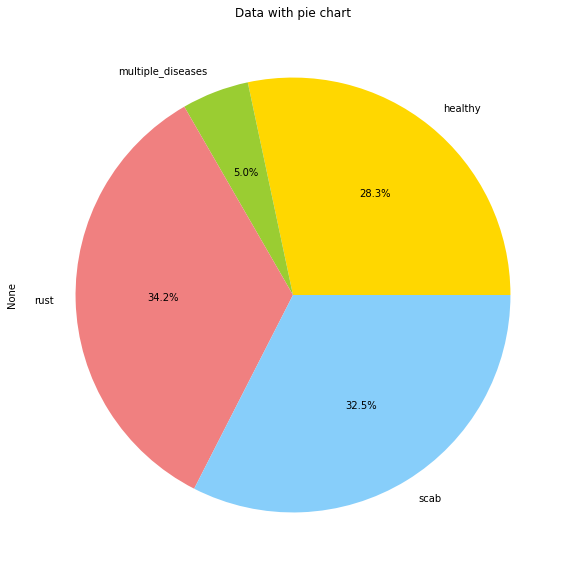

In [44]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

data.plot(kind='pie', colors=colors, title='Data with pie chart', figsize=(10,10),autopct='%1.1f%%'
)


In [48]:
from keras.preprocessing import image 
import numpy as np
import keras.utils as image

In [49]:
img_size  = 128 # image size during training 224

In [50]:
load_features = []

for i in train['image_id']:
    full_path = path + i + '.jpg'
    img = image.load_img(full_path, target_size=(img_size,img_size), color_mode = "grayscale")
    img = image.img_to_array(img)
    load_features.append(img)

In [51]:
X = np.asarray(load_features)

In [52]:
print('Shape of features:',X.shape)

Shape of features: (1821, 128, 128, 1)


In [53]:
train.head()
y = train.iloc[:, 1:]
y = y.to_numpy()

y.shape

(1821, 4)

In [118]:
y[:8]

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [56]:
y.sum(axis=0)

array([516,  91, 622, 592])

In [57]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [58]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (1365, 128, 128, 1)
y_train:  (1365, 4)
x_test:  (456, 128, 128, 1)
y_test:  (456, 4)


In [59]:
x_train_final = x_train /255
x_train_final.shape

(1365, 128, 128, 1)

In [60]:
x_test_final = x_test /255
x_test_final.shape

(456, 128, 128, 1)

In [61]:
y_train_final = y_train
y_train_final.shape

(1365, 4)

In [62]:
y_test_final = y_test
y_test_final.shape

(456, 4)

In [63]:
x_train_final=x_train_final.reshape(x_train_final.shape[0],img_size*img_size)

In [64]:
x_train_final.shape

(1365, 16384)

In [65]:
x_test_final=x_test_final.reshape(x_test_final.shape[0],img_size*img_size)
x_test_final.shape

(456, 16384)

In [66]:
y_train_final.sum(axis=0)

array([390,  69, 467, 439])

In [67]:
y_train_final[:, 0].sum(), y_train_final[:, 1].sum()

(390, 69)

In [68]:
y_train_final[:, 1]=y_train_final[:, 1]*2
y_train_final[:, 2]=y_train_final[:, 2]*3
y_train_final[:, 3]=y_train_final[:, 3]*4

In [69]:
y_train_final[:, 1].sum(),y_train_final[:, 2].sum(),y_train_final[:, 3].sum()

(138, 1401, 1756)

In [70]:
Y_train_final=y_train_final.sum(axis=1)

In [71]:
Y_train_final

array([3, 3, 1, ..., 3, 1, 3])

In [72]:
Y_train_final.shape

(1365,)

In [73]:
y_test_final[:, 1]=y_test_final[:, 1]*2
y_test_final[:, 2]=y_test_final[:, 2]*3
y_test_final[:, 3]=y_test_final[:, 3]*4
Y_test_final=y_test_final.sum(axis=1)

In [74]:
Y_test_final

array([3, 1, 1, 3, 1, 3, 3, 1, 4, 4, 1, 1, 3, 4, 4, 3, 3, 3, 4, 1, 4, 4,
       2, 1, 4, 3, 1, 3, 3, 3, 3, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 1,
       1, 3, 3, 1, 4, 4, 1, 4, 3, 1, 3, 4, 1, 4, 4, 1, 3, 2, 4, 3, 3, 1,
       3, 1, 4, 2, 4, 4, 2, 2, 1, 3, 4, 1, 4, 3, 4, 4, 4, 1, 3, 4, 1, 4,
       3, 1, 3, 3, 4, 1, 3, 1, 1, 4, 4, 4, 3, 3, 3, 2, 4, 3, 4, 1, 1, 1,
       3, 3, 3, 1, 4, 1, 3, 3, 4, 1, 4, 2, 3, 3, 4, 1, 3, 4, 1, 3, 4, 3,
       4, 3, 4, 4, 4, 4, 1, 3, 1, 4, 3, 3, 1, 1, 3, 3, 3, 3, 4, 3, 3, 1,
       4, 3, 4, 3, 4, 4, 1, 1, 1, 4, 3, 4, 3, 1, 4, 1, 1, 1, 4, 3, 3, 1,
       4, 3, 1, 3, 1, 4, 4, 3, 2, 3, 4, 4, 3, 3, 3, 3, 3, 3, 1, 4, 1, 1,
       4, 3, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 3, 3, 3, 1, 1, 4, 1, 4, 4,
       4, 1, 3, 3, 4, 4, 4, 4, 1, 3, 4, 4, 4, 1, 2, 4, 1, 1, 3, 1, 4, 2,
       3, 4, 1, 4, 1, 4, 3, 3, 2, 4, 3, 3, 4, 1, 3, 3, 1, 4, 3, 3, 2, 4,
       3, 1, 1, 1, 1, 4, 3, 1, 1, 1, 4, 4, 3, 3, 3, 4, 3, 4, 2, 3, 4, 4,
       1, 4, 1, 1, 1, 1, 3, 3, 4, 1, 1, 3, 3, 1, 1,

In [75]:
print('Training data and target sizes: \n{}, {} '.format(x_train_final.shape,Y_train_final.shape))
print('Test data and target sizes: \n{}, {}'.format(x_test_final.shape,Y_test_final.shape))

Training data and target sizes: 
(1365, 16384), (1365,) 
Test data and target sizes: 
(456, 16384), (456,)


In [76]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
classifier = svm.SVC(C=1, gamma=0.001, kernel='linear')

#Train the model using the training sets
classifier.fit(x_train_final, Y_train_final)

SVC(C=1, gamma=0.001, kernel='linear')

In [77]:
y_pred = classifier.predict(x_test_final)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:

Y_test_final

array([3, 1, 1, 3, 1, 3, 3, 1, 4, 4, 1, 1, 3, 4, 4, 3, 3, 3, 4, 1, 4, 4,
       2, 1, 4, 3, 1, 3, 3, 3, 3, 4, 4, 4, 3, 1, 3, 1, 4, 2, 3, 4, 4, 1,
       1, 3, 3, 1, 4, 4, 1, 4, 3, 1, 3, 4, 1, 4, 4, 1, 3, 2, 4, 3, 3, 1,
       3, 1, 4, 2, 4, 4, 2, 2, 1, 3, 4, 1, 4, 3, 4, 4, 4, 1, 3, 4, 1, 4,
       3, 1, 3, 3, 4, 1, 3, 1, 1, 4, 4, 4, 3, 3, 3, 2, 4, 3, 4, 1, 1, 1,
       3, 3, 3, 1, 4, 1, 3, 3, 4, 1, 4, 2, 3, 3, 4, 1, 3, 4, 1, 3, 4, 3,
       4, 3, 4, 4, 4, 4, 1, 3, 1, 4, 3, 3, 1, 1, 3, 3, 3, 3, 4, 3, 3, 1,
       4, 3, 4, 3, 4, 4, 1, 1, 1, 4, 3, 4, 3, 1, 4, 1, 1, 1, 4, 3, 3, 1,
       4, 3, 1, 3, 1, 4, 4, 3, 2, 3, 4, 4, 3, 3, 3, 3, 3, 3, 1, 4, 1, 1,
       4, 3, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 3, 3, 3, 1, 1, 4, 1, 4, 4,
       4, 1, 3, 3, 4, 4, 4, 4, 1, 3, 4, 4, 4, 1, 2, 4, 1, 1, 3, 1, 4, 2,
       3, 4, 1, 4, 1, 4, 3, 3, 2, 4, 3, 3, 4, 1, 3, 3, 1, 4, 3, 3, 2, 4,
       3, 1, 1, 1, 1, 4, 3, 1, 1, 1, 4, 4, 3, 3, 3, 4, 3, 4, 2, 3, 4, 4,
       1, 4, 1, 1, 1, 1, 3, 3, 4, 1, 1, 3, 3, 1, 1,

In [82]:
acc=accuracy_score(Y_test_final,y_pred)

In [83]:
acc

0.3333333333333333

In [84]:
train_predict=classifier.predict(x_train_final)

In [85]:
acc_train=accuracy_score(Y_train_final,train_predict)

In [86]:
acc_train

0.9992673992673993

In [95]:
import matplotlib.pyplot as plt

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train_final)
X_test = sc.transform(x_test_final)

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [160]:


clf = RandomForestClassifier(bootstrap=True, class_weight=None,
                             criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(x_train_final, Y_train_final)
y_pred_forest = clf.predict(x_test_final)

In [119]:

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test_final, y_pred_forest))

0.40789473684210525


In [112]:
y_pred_forest_test = clf.predict(x_train_final)

print(accuracy_score(Y_train_final, y_pred_forest_test))

0.9992673992673993


In [158]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average  Score: ", scores.mean())
print("Number of  Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93333333 0.97777778 0.97777778 0.93333333 0.97777778]
Average  Score:  0.96
Number of  Scores used in Average:  5


In [126]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_final, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_final, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_final, y_pred)))

Mean Absolute Error: 1.2653508771929824
Mean Squared Error: 2.861842105263158
Root Mean Squared Error: 1.6916979946973862


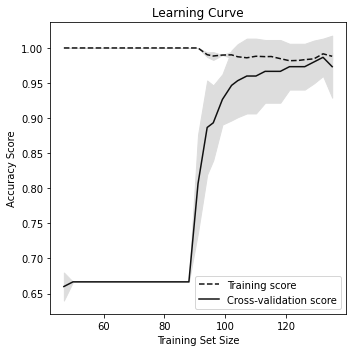

In [157]:
from sklearn.ensemble import RandomForestClassifier#loss
from sklearn import datasets
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(classifier,X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [154]:
checkpoint=ModelCheckpoint(r'D:\Python37\Projects\Foliar diseases in apple trees\models\apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]


In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import Model

In [161]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=10,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

NameError: ignored